In [14]:
from mappymatch.constructs.trace import Trace
from mappymatch.utils.geo import geofence_from_trace
from mappymatch.maps.nx.readers.osm_readers import read_osm_nxmap
from mappymatch.matchers.lcss.lcss import LCSSMatcher
from mappymatch.matchers.matcher_interface import MatchResult
from mappymatch import root
import matplotlib.pyplot as plt

In [15]:
def plot_match_distances(matches: MatchResult):
    """
        Summary: Plot the points deviance from known roads with matplotlib.

        Issues:
            we have two different dataframes one labeled with gdf and the other with df. --> to resolve this, the gdf labeled data frames have been changed to df labels.

        Args:
            coord_df (pandas dataframe): coords of guessed points in the area.
    """

    y = [m.distance for m in matches]
    x = [x for x in range(0, len(y))]  # this line create placeholder values for x axis

    plt.figure(figsize=(15, 7))
    plt.autoscale(
        enable=True
    )
    plt.scatter(
        x, y
    )
    plt.title("Distance To Nearest Road")
    plt.ylabel("Meters")
    plt.xlabel(
        "Point Along The Path"
    )
    plt.show()


In [18]:
def plot_example_fromcsv(file_path):  #
    """
    Summary:
       Provided a file path, the plot_example_fromcsv function creates a trace, geofence, road_map, and matcher using LCSSMatcher and then passes the matches object to the plot_matches function. This function generates a fmap, but it also runs the plot_match_distances function before it finishes executing. With some tweaking this can be customized to the users preferences.

    Args:
        file_path (str, optional): _description_. Defaults to 'resources/traces/sample_trace_1.csv'.
    """
    try:
        trace = Trace.from_csv(root() / f"{file_path}")
    except Exception:
        trace = Trace.from_csv(
            f"{file_path}"
        )  # catches any file entry errors.
    geofence = geofence_from_trace(trace, padding=1e3)
    road_map = read_osm_nxmap(geofence)
    matcher = LCSSMatcher(road_map)
    matches = matcher.match_trace(trace)
    plot_match_distances(matches) # call the plot_matches function which will plot the matches with matplotlib


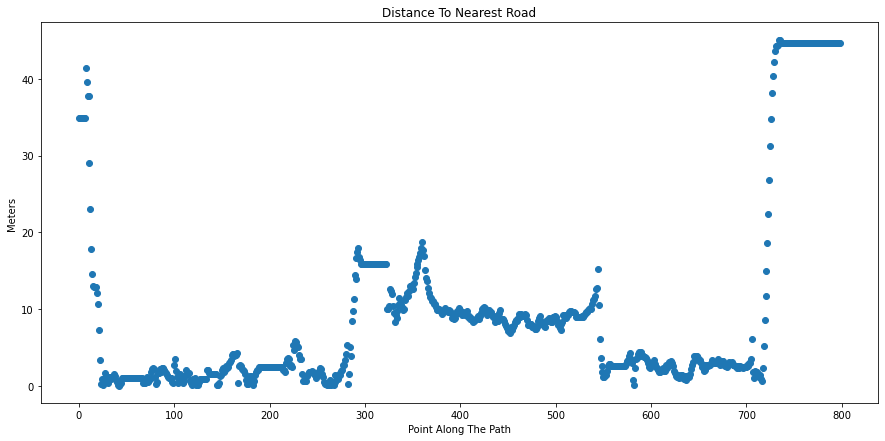

In [19]:
file_path = "../resources/traces/sample_trace_2.csv"
plot_example_fromcsv(file_path)